In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [10]:
x1_train = np.array([12,14.5,10,18,8.5,15,22,11,13,20.5,24,16,12.5,28,9,25,14,19,10.5,26.5,15.5,17]) 

In [11]:
x2_train = np.array([0,1,2,0,4,1,0,5,2,1,2,3,0,0,6,1,4,2,2,2,5,3])

In [12]:
y_train = np.array([0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1])

In [13]:
x1_zero = x1_train[y_train == 0]
x2_zero = x2_train[y_train == 0]

x1_one = x1_train[y_train == 1]
x2_one = x2_train[y_train == 1]

COST = []
ITER = []

## here i am constrcting array of those numbers in which result is one and result is zero 

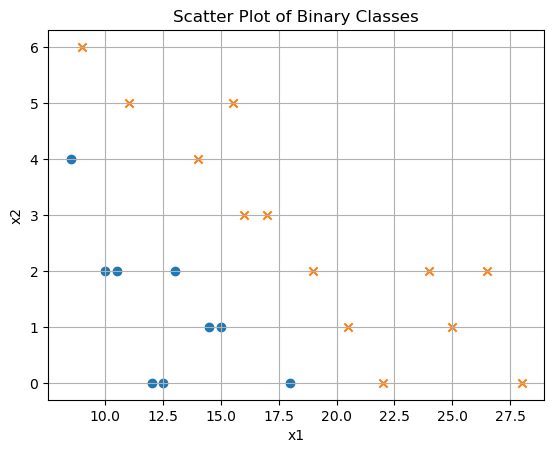

In [14]:

##here i am reperesenting the both data as dot = 0 and cross = 1 
## here you can see the represente daata using matplotlib


plt.scatter(x1_zero, x2_zero, marker='o')


plt.scatter(x1_one, x2_one, marker='x')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of Binary Classes")
plt.grid(True)

plt.show()

In [56]:
##lets initialise some variable first 
## h(x) = v x1 + w x2 + b ;

v = 100 
w = 100 
b = 100 
alpha = 1## our learning rate it would be 
m = x1_train.shape[0]

In [57]:
def cost_function(v, w, b, x1_train, x2_train, y_train):
    cost = 0.0
    m = y_train.shape[0]
    for i in range(m):
        z = v * x1_train[i] + w * x2_train[i] + b
        h = 1 / (1 + math.exp(-z))
        h = min(max(h, 1e-15), 1 - 1e-15)
        yi = y_train[i]
        cost += yi * math.log(h) + (1 - yi) * math.log(1 - h)
    return -cost /m
## it will return our cost value 

In [58]:
## this function will return us dj_dv , dj_dw , dj_db
import math
def compute_gradient(v, w, b, x1_train, x2_train, y_train):
    m = x1_train.shape[0]
    dj_dv = 0.0
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        z = v * x1_train[i] + w * x2_train[i] + b
        h = 1 / (1 + math.exp(-z))
        diff = h - y_train[i]
        dj_dv -= diff * x1_train[i]
        dj_dw -= diff * x2_train[i]
        dj_db -= diff
    dj_dv /= m
    dj_dw /= m
    dj_db /= m
    return dj_dv, dj_dw, dj_db


In [59]:
def gradient_descent(v, w, b, x1_train, x2_train, y_train):
    num_iters = 100000
    COST.clear()
    ITER.clear()
    for i in range(num_iters):
        dj_dv, dj_dw, dj_db = compute_gradient(v, w, b, x1_train, x2_train, y_train)
        v += alpha * dj_dv
        w += alpha * dj_dw 
        b += alpha * dj_db
        if (i%10000 == 0 ) :
            print(cost_function(v, w, b, x1_train, x2_train, y_train))
            COST.append (cost_function(v, w, b, x1_train, x2_train, y_train))
            ITER.append(i)
        
    return v, w, b
## i ll be running gradient descent here

In [ ]:
v , w , b = gradient_descent(v, w, b, x1_train, x2_train, y_train)
print(v)
print(w)
print(b)



for i in range(len(y_train)):
    if y_train[i] == 0:
        plt.scatter(x1_train[i], x2_train[i], color='blue', marker='o')
    else:
        plt.scatter(x1_train[i], x2_train[i], color='red', marker='x')

# decision boundary
x_vals = np.linspace(min(x1_train), max(x1_train), 10)
y_vals = -(v * x_vals + b) / w       

plt.plot(x_vals, y_vals, color='black', linewidth=2)

plt.xlabel("SPEED")
plt.ylabel("AMMO")
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.show()


14.129826542321268


In [53]:
## now check our test case 
speed = 25
ammo = 1
hiz = v*speed+w*ammo+b
ans = 1 /(1 + math.exp(-hiz))
print(ans)

0.9999999482960253


## as ans is approxitmaletly going to 1 
#### yeah it is sure that it will die

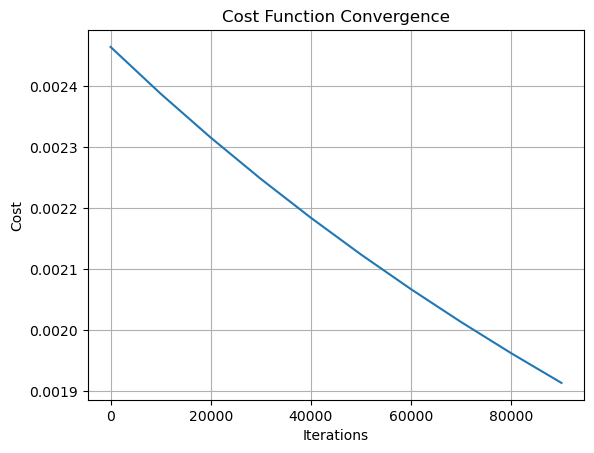

In [54]:
plt.plot(ITER, COST)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()


### heh my first logistics regression model it is 